In [58]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset,DataLoader
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import scipy.stats as stats

import time

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats("svg")

In [59]:
data = pd.read_csv('winequality-red.csv',sep=";")

data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [60]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


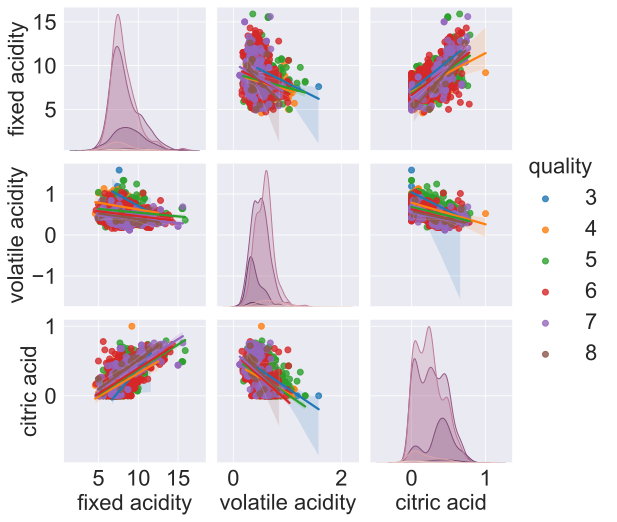

In [61]:
colsPlot = ["fixed acidity","volatile acidity","citric acid","quality"]
sns.pairplot(data[colsPlot],kind='reg',hue="quality")
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_26364\9538946.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45)


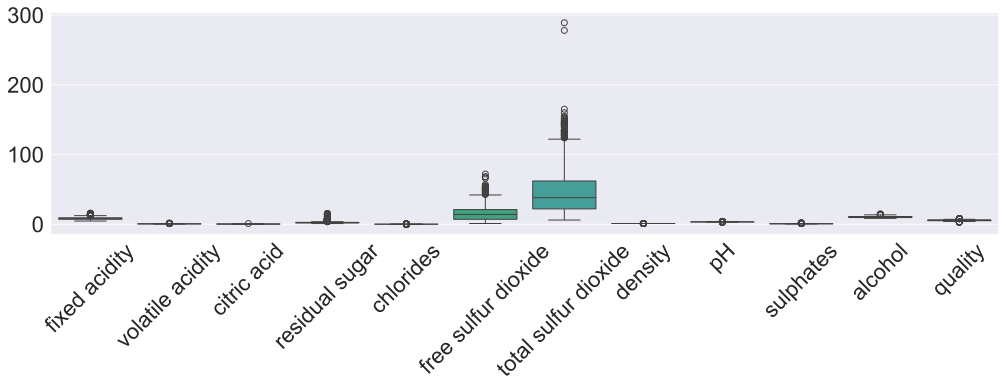

In [62]:
# divercity of ranges
fig,ax = plt.subplots(1,figsize=(17,4))
ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

# remove rows with outliers
data = data[data["total sulfur dioxide"] < 200]

In [63]:
### z-score variables except for quality

colsZscore = data.keys()
colsZscore = colsZscore.drop('quality')

# z-score 
# for col in colsZscore:
#     meanVal = np.mean(data[col])
#     stdVal = np.std(data[col],ddof=1)
#     data[col] = (data[col] - meanVal)/stdVal
    
# more compactly
data[colsZscore] = data[colsZscore].apply(stats.zscore)

data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000
mean,8.320163,0.528106,0.270463,2.531590,0.087513,15.847840,46.170946,0.996751,3.311490,0.658334,10.420632,5.634314
std,1.742123,0.178990,0.194384,1.395974,0.047076,10.438642,31.826498,0.001884,0.154115,0.169532,1.064260,0.806630
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997840,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,165.000000,1.003690,4.010000,2.000000,14.900000,8.000000


C:\Users\User\AppData\Local\Temp\ipykernel_26364\1963285939.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45)


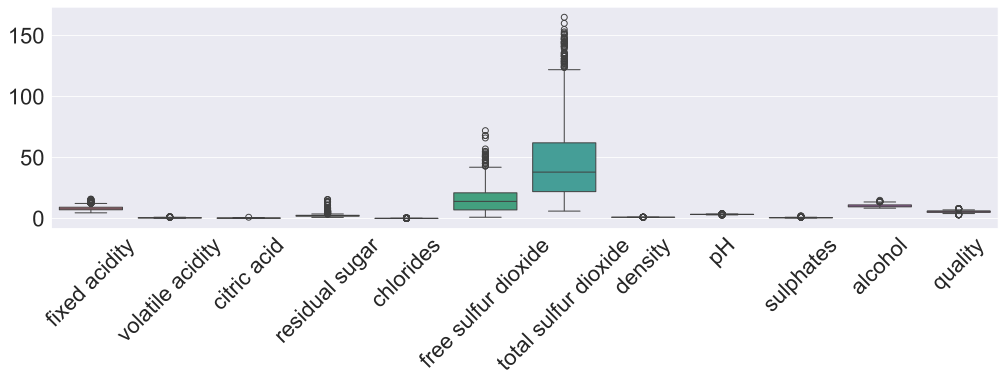

In [64]:
# divercity of ranges
fig,ax = plt.subplots(1,figsize=(17,4))
ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()


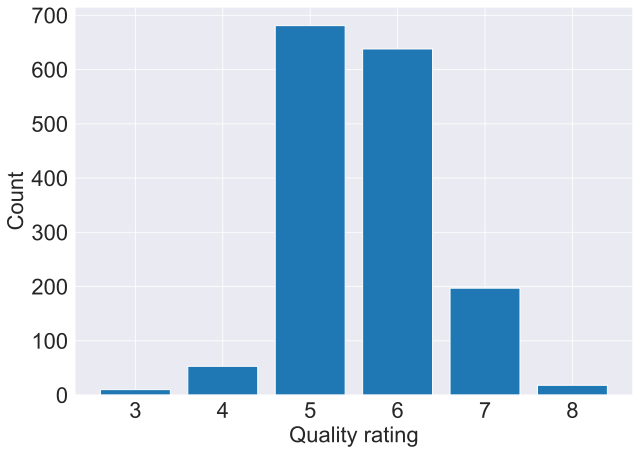

C:\Users\User\AppData\Local\Temp\ipykernel_26364\1650140184.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["boolQuality"] = 0
C:\Users\User\AppData\Local\Temp\ipykernel_26364\1650140184.py:12: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = 

,quality,boolQuality
0,5,0
1,5,0
2,5,0
3,6,1
4,5,0
...,...,...
1594,5,0
1595,6,1
1596,6,1
1597,5,0


In [65]:
fig = plt.figure(figsize=(10,7))
plt.rcParams.update({'font.size': 22})

counts = data['quality'].value_counts()
plt.bar(list(counts.keys()),counts)
plt.xlabel("Quality rating")
plt.ylabel("Count")
plt.show()

# create a new column for binarized (boolean) quality
data["boolQuality"] = 0
data["boolQuality"][data["quality"]> 5] = 1

data[["quality","boolQuality" ]]

In [66]:
# convert from pandas to tensro
dataT = torch.tensor(data[colsZscore].values).float()
labels = torch.tensor(data["boolQuality"].values).float()

print(dataT.shape)
print(labels.shape)

labels = labels[:,None]
print(labels.shape)

torch.Size([1597, 11])
torch.Size([1597])
torch.Size([1597, 1])


In [67]:
train_data,test_data,train_labels,test_labels = train_test_split(dataT,labels,test_size=.2)

train_dataSet = TensorDataset(train_data,train_labels)
test_dataSet = TensorDataset(test_data,test_labels)

In [68]:
# for X,y in train_loader:
#     print(X.shape,y.shape)

### Training Model

In [69]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.input = nn.Linear(11,16)
        
        self.fc1 = nn.Linear(16,32) 
        self.fc2 = nn.Linear(32,32) 
            
        self.output = nn.Linear(32,1)
        
    def forward(self,x):
        
        x = F.relu(self.input(x))
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
            
        x = self.output(x)
        return x
        

In [70]:

num_epochs = 1000

def trainNet():
    
    lossFn = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.SGD(wineNet.parameters(), lr=0.01)
    
    losses = torch.zeros(num_epochs)    
    trainAcc = []
    testAcc = []
    
    for epochI in range(num_epochs):
        
        wineNet.train()
        
        batchAcc = []
        batchLoss = []
        for X,y in train_loader:
            
            yHat = wineNet(X)
            
            loss = lossFn(yHat,y)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            batchLoss.append(loss.item())
            
            batchAcc.append(100*torch.mean(((yHat > 0) == y).float()).item())
        # avg training acc
        trainAcc.append( np.mean(batchAcc) )
        
        # average losses across batches
        losses[epochI] = np.mean(batchLoss)
        wineNet.eval()
        X,y = next(iter(test_loader))
        with torch.no_grad():
            yHat = wineNet(X)
        testAcc.append(100*torch.mean(((yHat > 0) == y).float()).item())
        
    return trainAcc,testAcc,losses

### Experimenting

In [71]:
# takes ~8min

# range of batch sizes
batchSizes = 2**np.arange(1,10,2)

# init output res matricies
accResTrain = np.zeros((num_epochs,len(batchSizes)))
accResTest = np.zeros((num_epochs,len(batchSizes)))
compTime = np.zeros(len(batchSizes))

test_loader = DataLoader(test_dataSet,batch_size=test_dataSet.tensors[0].shape[0])

for bI in range(len(batchSizes)):
    
    startTime = time.process_time()
    
    # dataloader obj
    train_loader = DataLoader(train_dataSet,batch_size=int(batchSizes[bI]),shuffle=True,drop_last=True)
    
    # create model
    wineNet = Net()
    trainAcc,testAcc,losses = trainNet()
    
    accResTrain[:,bI] = trainAcc
    accResTest[:,bI] = testAcc
    
    compTime[bI] = time.process_time() - startTime

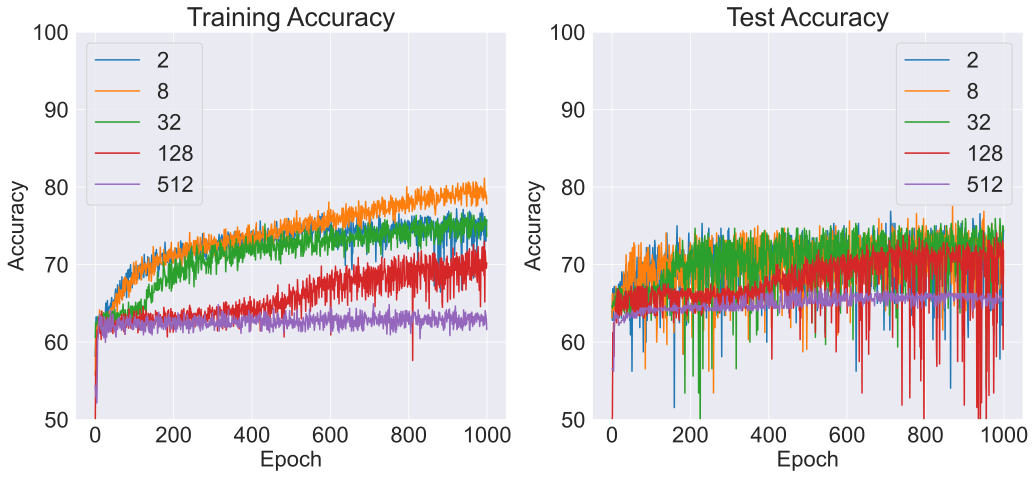

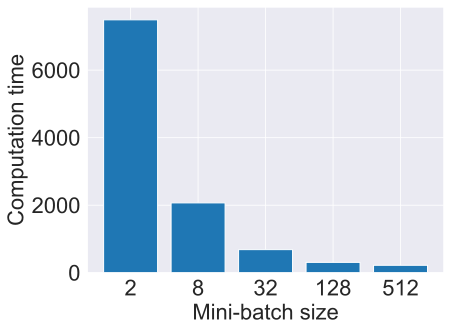

In [72]:
fig,ax = plt.subplots(1,2,figsize=(17,7))

ax[0].plot(accResTrain)
ax[0].set_title("Training Accuracy")
ax[1].plot(accResTest)
ax[1].set_title("Test Accuracy")

# common features
for i in range(2):
    ax[i].legend(batchSizes)
    ax[i].set_xlabel("Epoch")
    ax[i].set_ylabel("Accuracy")
    ax[i].set_ylim([50,100])
    # ax[i].grid()
    
plt.show()


plt.bar(range(len(compTime)),compTime,tick_label=batchSizes)
plt.xlabel("Mini-batch size")
plt.ylabel("Computation time")
plt.show()